# Advanced - Stacking and Unstacking

Let's mix it up, change the dataset back to the store sales data.

In [1]:
import pandas as pd
import seaborn as sb

dfo = pd.read_csv("train.csv", low_memory=False)
dfo.dropna()
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [2]:
df = dfo.set_index(["Store", "Date"])
df = df.sort_index()
df.head()

DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Store Date                                                                
1     2013-01-01          2      0          0     0      0            a   
      2013-01-02          3   5530        668     1      0            0   
      2013-01-03          4   4327        578     1      0            0   
      2013-01-04          5   4486        619     1      0            0   
      2013-01-05          6   4997        635     1      0            0   

                  SchoolHoliday  
Store Date                       
1     2013-01-01              1  
      2013-01-02              1  
      2013-01-03              1  
      2013-01-04              1  
      2013-01-05              1

## Stacking and unstacking

You've seen this briefly with GroupBy results. Let's go into more detail now. Stacking however only works if there aren't duplicates in your index. It must be uniquely specifying the row.


In [3]:
df.unstack()

DayOfWeek                                                         \
Date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
Store                                                                     
1            2.0        3.0        4.0        5.0        6.0        7.0   
2            2.0        3.0        4.0        5.0        6.0        7.0   
3            2.0        3.0        4.0        5.0        6.0        7.0   
4            2.0        3.0        4.0        5.0        6.0        7.0   
5            2.0        3.0        4.0        5.0        6.0        7.0   
...          ...        ...        ...        ...        ...        ...   
1111         2.0        3.0        4.0        5.0        6.0        7.0   
1112         2.0        3.0        4.0        5.0        6.0        7.0   
1113         2.0        3.0        4.0        5.0        6.0        7.0   
1114         2.0        3.0        4.0        5.0        6.0        7.0   
1115         2.0        3.0        4.0        5.0        6.0        7.0   

                                                   ... SchoolHoliday  \
Date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ...    2015-07-22   
Store                                              ...                 
1            1.0        2.0        3.0        4.0  ...           0.0   
2            1.0        2.0        3.0        4.0  ...           1.0   
3            1.0        2.0        3.0        4.0  ...           1.0   
4            1.0        2.0        3.0        4.0  ...           1.0   
5            1.0        2.0        3.0        4.0  ...           1.0   
...          ...        ...        ...        ...  ...           ...   
1111         1.0        2.0        3.0        4.0  ...           1.0   
1112         1.0        2.0        3.0        4.0  ...           1.0   
1113         1.0        2.0        3.0        4.0  ...           1.0   
1114         1.0        2.0        3.0        4.0  ...           1.0   
1115         1.0        2.0        3.0        4.0  ...           0.0   

                                                                         \
Date  2015-07-23 2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28   
Store                                                                     
1            0.0        0.0        0.0        0.0        1.0        1.0   
2            1.0        1.0        0.0        0.0        1.0        1.0   
3            1.0        1.0        0.0        0.0        1.0        1.0   
4            1.0        1.0        0.0        0.0        1.0        1.0   
5            1.0        1.0        0.0        0.0        1.0        1.0   
...          ...        ...        ...        ...        ...        ...   
1111         1.0        1.0        0.0        0.0        1.0        1.0   
1112         1.0        1.0        0.0        0.0        1.0        1.0   
1113         1.0        1.0        0.0        0.0        1.0        1.0   
1114         1.0        1.0        0.0        0.0        1.0        1.0   
1115         0.0        0.0        0.0        0.0        1.0        1.0   

                                        
Date  2015-07-29 2015-07-30 2015-07-31  
Store                                   
1            1.0        1.0        1.0  
2            1.0        1.0        1.0  
3            1.0        1.0        1.0  
4            1.0        1.0        1.0  
5            1.0        1.0        1.0  
...          ...        ...        ...  
1111         1.0        1.0        1.0  
1112         1.0        1.0        1.0  
1113         1.0        1.0        1.0  
1114         1.0        1.0        1.0  
1115         1.0        1.0        1.0  

[1115 rows x 6594 columns]

In [4]:
df.Sales.unstack()

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
Store,,,,,,,,,,,,,,,,,,,,,
1,0.0,5530.0,4327.0,4486.0,4997.0,0.0,7176.0,5580.0,5471.0,4892.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,0.0,4422.0,4159.0,4484.0,2342.0,0.0,6775.0,6318.0,6763.0,5618.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,0.0,6823.0,5902.0,6069.0,4523.0,0.0,12247.0,9800.0,8001.0,7772.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,0.0,9941.0,8247.0,8290.0,10338.0,0.0,12112.0,10031.0,8857.0,9472.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,0.0,4253.0,3465.0,4456.0,1590.0,0.0,6978.0,5718.0,5974.0,4999.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.0,5097.0,4579.0,4640.0,3325.0,0.0,9444.0,6472.0,5307.0,5887.0,...,4021.0,3587.0,3918.0,2177.0,0.0,7742.0,6793.0,4907.0,5263.0,5723.0
1112,0.0,10797.0,8716.0,9788.0,9513.0,0.0,25165.0,17058.0,14724.0,14366.0,...,6029.0,6730.0,6220.0,6216.0,0.0,14383.0,9583.0,9179.0,9652.0,9626.0
1113,0.0,6218.0,5563.0,5524.0,5194.0,0.0,8984.0,6866.0,6115.0,7508.0,...,4565.0,6410.0,6399.0,4784.0,0.0,7582.0,6468.0,6640.0,7491.0,7289.0


In [5]:
df.Sales.unstack(level="Store")

Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,5530.0,4422.0,6823.0,9941.0,4253.0,6089.0,8244.0,5419.0,4903.0,4812.0,...,5099.0,3955.0,6220.0,4576.0,4126.0,5097.0,10797.0,6218.0,20642.0,3697.0
2013-01-03,4327.0,4159.0,5902.0,8247.0,3465.0,5398.0,7231.0,4842.0,4602.0,4675.0,...,4330.0,3151.0,4779.0,3654.0,3508.0,4579.0,8716.0,5563.0,18463.0,4297.0
2013-01-04,4486.0,4484.0,6069.0,8290.0,4456.0,6092.0,7758.0,4059.0,4798.0,5114.0,...,3956.0,3990.0,5491.0,3596.0,3933.0,4640.0,9788.0,5524.0,18371.0,4540.0
2013-01-05,4997.0,2342.0,4523.0,10338.0,1590.0,3872.0,5218.0,2337.0,4254.0,4256.0,...,2624.0,5128.0,2113.0,2897.0,3156.0,3325.0,9513.0,5194.0,18856.0,4771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,6102.0,6627.0,8107.0,11812.0,7059.0,5723.0,14869.0,8739.0,10649.0,7212.0,...,7042.0,11221.0,10717.0,8082.0,6761.0,7742.0,14383.0,7582.0,26720.0,10712.0
2015-07-28,5011.0,5671.0,8864.0,10275.0,6083.0,4839.0,12342.0,6717.0,8751.0,6140.0,...,6037.0,9533.0,8211.0,6478.0,5282.0,6793.0,9583.0,6468.0,25518.0,8093.0
2015-07-29,4782.0,6402.0,7610.0,10514.0,5899.0,5275.0,12074.0,7029.0,7776.0,5524.0,...,5536.0,8168.0,6302.0,6212.0,4600.0,4907.0,9179.0,6640.0,25840.0,7661.0


What happens if you have more levels?

In [6]:
df2 = dfo.set_index(["Store", "Date", "Open"])
df2 = df2.sort_index()
df2.head()

DayOfWeek  Sales  Customers  Promo StateHoliday  \
Store Date       Open                                                    
1     2013-01-01 0             2      0          0      0            a   
      2013-01-02 1             3   5530        668      0            0   
      2013-01-03 1             4   4327        578      0            0   
      2013-01-04 1             5   4486        619      0            0   
      2013-01-05 1             6   4997        635      0            0   

                       SchoolHoliday  
Store Date       Open                 
1     2013-01-01 0                 1  
      2013-01-02 1                 1  
      2013-01-03 1                 1  
      2013-01-04 1                 1  
      2013-01-05 1                 1

In [9]:
df2.Customers.unstack(level="Open")

Open                0      1
Store Date                  
1     2013-01-01  0.0    NaN
      2013-01-02  NaN  668.0
      2013-01-03  NaN  578.0
      2013-01-04  NaN  619.0
      2013-01-05  NaN  635.0
...               ...    ...
1115  2015-07-27  NaN  608.0
      2015-07-28  NaN  500.0
      2015-07-29  NaN  473.0
      2015-07-30  NaN  502.0
      2015-07-31  NaN  538.0

[1017209 rows x 2 columns]

In [13]:
df2.Customers.unstack(level=["Store", "Open"], fill_value=0)

Store      1         2         3         4          5          ... 1111       \
Open          0    1    0    1    0    1    0     1    0    1  ...    0    1   
Date                                                           ...             
2013-01-01    0    0    0    0    0    0    0     0    0    0  ...    0    0   
2013-01-02    0  668    0  650    0  805    0  1429    0  577  ...    0  505   
2013-01-03    0  578    0  555    0  721    0  1248    0  491  ...    0  444   
2013-01-04    0  619    0  574    0  690    0  1232    0  533  ...    0  453   
2013-01-05    0  635    0  324    0  525    0  1514    0  202  ...    0  291   
...         ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
2015-07-27    0  612    0  638    0  768    0  1379    0  650  ...    0  515   
2015-07-28    0  560    0  646    0  818    0  1191    0  598  ...    0  493   
2015-07-29    0  523    0  727    0  716    0  1258    0  658  ...    0  403   
2015-07-30    0  546    0  601    0  823    0  1276    0  539  ...    0  439   
2015-07-31    0  555    0  625    0  821    0  1498    0  559  ...    0  422   

Store      1112      1113      1114       1115       
Open          0    1    0    1    0     1    0    1  
Date                                                 
2013-01-01    0    0    0    0    0     0    0    0  
2013-01-02    0  892    0  753    0  3401    0  305  
2013-01-03    0  809    0  718    0  3211    0  300  
2013-01-04    0  861    0  646    0  3036    0  326  
2013-01-05    0  856    0  569    0  3065    0  339  
...         ...  ...  ...  ...  ...   ...  ...  ...  
2015-07-27    0  946    0  684    0  3468    0  608  
2015-07-28    0  713    0  584    0  3456    0  500  
2015-07-29    0  709    0  589    0  3545    0  473  
2015-07-30    0  728    0  716    0  3251    0  502  
2015-07-31    0  767    0  720    0  3745    0  538  

[942 rows x 2220 columns]

In [14]:
tmp = df2.Customers.unstack(level=["Store", "Open"])

In [15]:
tmp.index

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26',
       '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31'],
      dtype='object', name='Date', length=942)

In [16]:
tmp.columns

MultiIndex([(   1, 0),
            (   1, 1),
            (   2, 0),
            (   2, 1),
            (   3, 0),
            (   3, 1),
            (   4, 0),
            (   4, 1),
            (   5, 0),
            (   5, 1),
            ...
            (1111, 0),
            (1111, 1),
            (1112, 0),
            (1112, 1),
            (1113, 0),
            (1113, 1),
            (1114, 0),
            (1114, 1),
            (1115, 0),
            (1115, 1)],
           names=['Store', 'Open'], length=2220)

In [17]:
tmp.stack()

Store             1      2      3       4      5      6       7      8     \
Date       Open                                                             
2013-01-01 0       0.0    0.0    0.0     0.0    0.0    0.0     0.0    0.0   
           1       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
2013-01-02 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
           1     668.0  650.0  805.0  1429.0  577.0  781.0   955.0  698.0   
2013-01-03 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
...                ...    ...    ...     ...    ...    ...     ...    ...   
2015-07-29 1     523.0  727.0  716.0  1258.0  658.0  542.0  1166.0  698.0   
2015-07-30 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
           1     546.0  601.0  823.0  1276.0  539.0  541.0  1116.0  882.0   
2015-07-31 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
           1     555.0  625.0  821.0  1498.0  559.0  589.0  1414.0  833.0   

Store             9      10    ...   1106   1107   1108   1109   1110   1111  \
Date       Open                ...                                             
2013-01-01 0       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
           1       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2013-01-02 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
           1     481.0  521.0  ...  620.0  525.0  701.0  444.0  507.0  505.0   
2013-01-03 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
...                ...    ...  ...    ...    ...    ...    ...    ...    ...   
2015-07-29 1     625.0  518.0  ...  544.0  748.0  550.0  500.0  509.0  403.0   
2015-07-30 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
           1     651.0  556.0  ...  577.0  712.0  614.0  466.0  510.0  439.0   
2015-07-31 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
           1     687.0  681.0  ...  618.0  825.0  645.0  515.0  642.0  422.0   

Store             1112   1113    1114   1115  
Date       Open                               
2013-01-01 0       0.0    0.0     0.0    0.0  
           1       NaN    NaN     NaN    NaN  
2013-01-02 0       NaN    NaN     NaN    NaN  
           1     892.0  753.0  3401.0  305.0  
2013-01-03 0       NaN    NaN     NaN    NaN  
...                ...    ...     ...    ...  
2015-07-29 1     709.0  589.0  3545.0  473.0  
2015-07-30 0       NaN    NaN     NaN    NaN  
           1     728.0  716.0  3251.0  502.0  
2015-07-31 0       NaN    NaN     NaN    NaN  
           1     767.0  720.0  3745.0  538.0  

[1636 rows x 1115 columns]

In [20]:
tmp.stack(level=["Store", "Open"]).to_frame()

0
Date       Store Open        
2013-01-01 1     0        0.0
           2     0        0.0
           3     0        0.0
           4     0        0.0
           5     0        0.0
...                       ...
2015-07-31 1111  1      422.0
           1112  1      767.0
           1113  1      720.0
           1114  1     3745.0
           1115  1      538.0

[1017209 rows x 1 columns]

In [21]:
tmp.stack().stack()

Date        Open  Store
2013-01-01  0     1           0.0
                  2           0.0
                  3           0.0
                  4           0.0
                  5           0.0
                            ...  
2015-07-31  1     1111      422.0
                  1112      767.0
                  1113      720.0
                  1114     3745.0
                  1115      538.0
Length: 1017209, dtype: float64

## Motivational Example

Dammit Sam, I need to see the yearly trend over each store!

In [23]:
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [26]:
x = dfo.set_index(["Store", "Date"])[["Sales"]]
x.head()

,,Sales
Store,Date,
1,2015-07-31,5263
2,2015-07-31,6064
3,2015-07-31,8314
4,2015-07-31,13995
5,2015-07-31,4822


In [27]:
x2 = x.unstack()
x2

Sales                                                         \
Date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
Store                                                                     
1            0.0     5530.0     4327.0     4486.0     4997.0        0.0   
2            0.0     4422.0     4159.0     4484.0     2342.0        0.0   
3            0.0     6823.0     5902.0     6069.0     4523.0        0.0   
4            0.0     9941.0     8247.0     8290.0    10338.0        0.0   
5            0.0     4253.0     3465.0     4456.0     1590.0        0.0   
...          ...        ...        ...        ...        ...        ...   
1111         0.0     5097.0     4579.0     4640.0     3325.0        0.0   
1112         0.0    10797.0     8716.0     9788.0     9513.0        0.0   
1113         0.0     6218.0     5563.0     5524.0     5194.0        0.0   
1114         0.0    20642.0    18463.0    18371.0    18856.0        0.0   
1115         0.0     3697.0     4297.0     4540.0     4771.0        0.0   

                                                   ...                        \
Date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ... 2015-07-22 2015-07-23   
Store                                              ...                         
1         7176.0     5580.0     5471.0     4892.0  ...     3464.0     3769.0   
2         6775.0     6318.0     6763.0     5618.0  ...     5093.0     4108.0   
3        12247.0     9800.0     8001.0     7772.0  ...     5414.0     5702.0   
4        12112.0    10031.0     8857.0     9472.0  ...     8503.0     7286.0   
5         6978.0     5718.0     5974.0     4999.0  ...     3595.0     3713.0   
...          ...        ...        ...        ...  ...        ...        ...   
1111      9444.0     6472.0     5307.0     5887.0  ...     4021.0     3587.0   
1112     25165.0    17058.0    14724.0    14366.0  ...     6029.0     6730.0   
1113      8984.0     6866.0     6115.0     7508.0  ...     4565.0     6410.0   
1114     21237.0    18816.0    17073.0    18075.0  ...    20424.0    20564.0   
1115      6905.0     5243.0     4649.0     5007.0  ...     5342.0     6150.0   

                                                                         \
Date  2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28 2015-07-29   
Store                                                                     
1         3706.0     4364.0        0.0     6102.0     5011.0     4782.0   
2         3854.0     2512.0        0.0     6627.0     5671.0     6402.0   
3         5080.0     3878.0        0.0     8107.0     8864.0     7610.0   
4         8322.0     9322.0        0.0    11812.0    10275.0    10514.0   
5         3815.0     2030.0        0.0     7059.0     6083.0     5899.0   
...          ...        ...        ...        ...        ...        ...   
1111      3918.0     2177.0        0.0     7742.0     6793.0     4907.0   
1112      6220.0     6216.0        0.0    14383.0     9583.0     9179.0   
1113      6399.0     4784.0        0.0     7582.0     6468.0     6640.0   
1114     19627.0    21312.0        0.0    26720.0    25518.0    25840.0   
1115      5816.0     6897.0        0.0    10712.0     8093.0     7661.0   

                             
Date  2015-07-30 2015-07-31  
Store                        
1         5020.0     5263.0  
2         5567.0     6064.0  
3         8977.0     8314.0  
4        10387.0    13995.0  
5         4943.0     4822.0  
...          ...        ...  
1111      5263.0     5723.0  
1112      9652.0     9626.0  
1113      7491.0     7289.0  
1114     24395.0    27508.0  
1115      8405.0     8680.0  

[1115 rows x 942 columns]

In [28]:
means = x2.mean(axis=1)
x_norm = x2.div(means, axis=0)

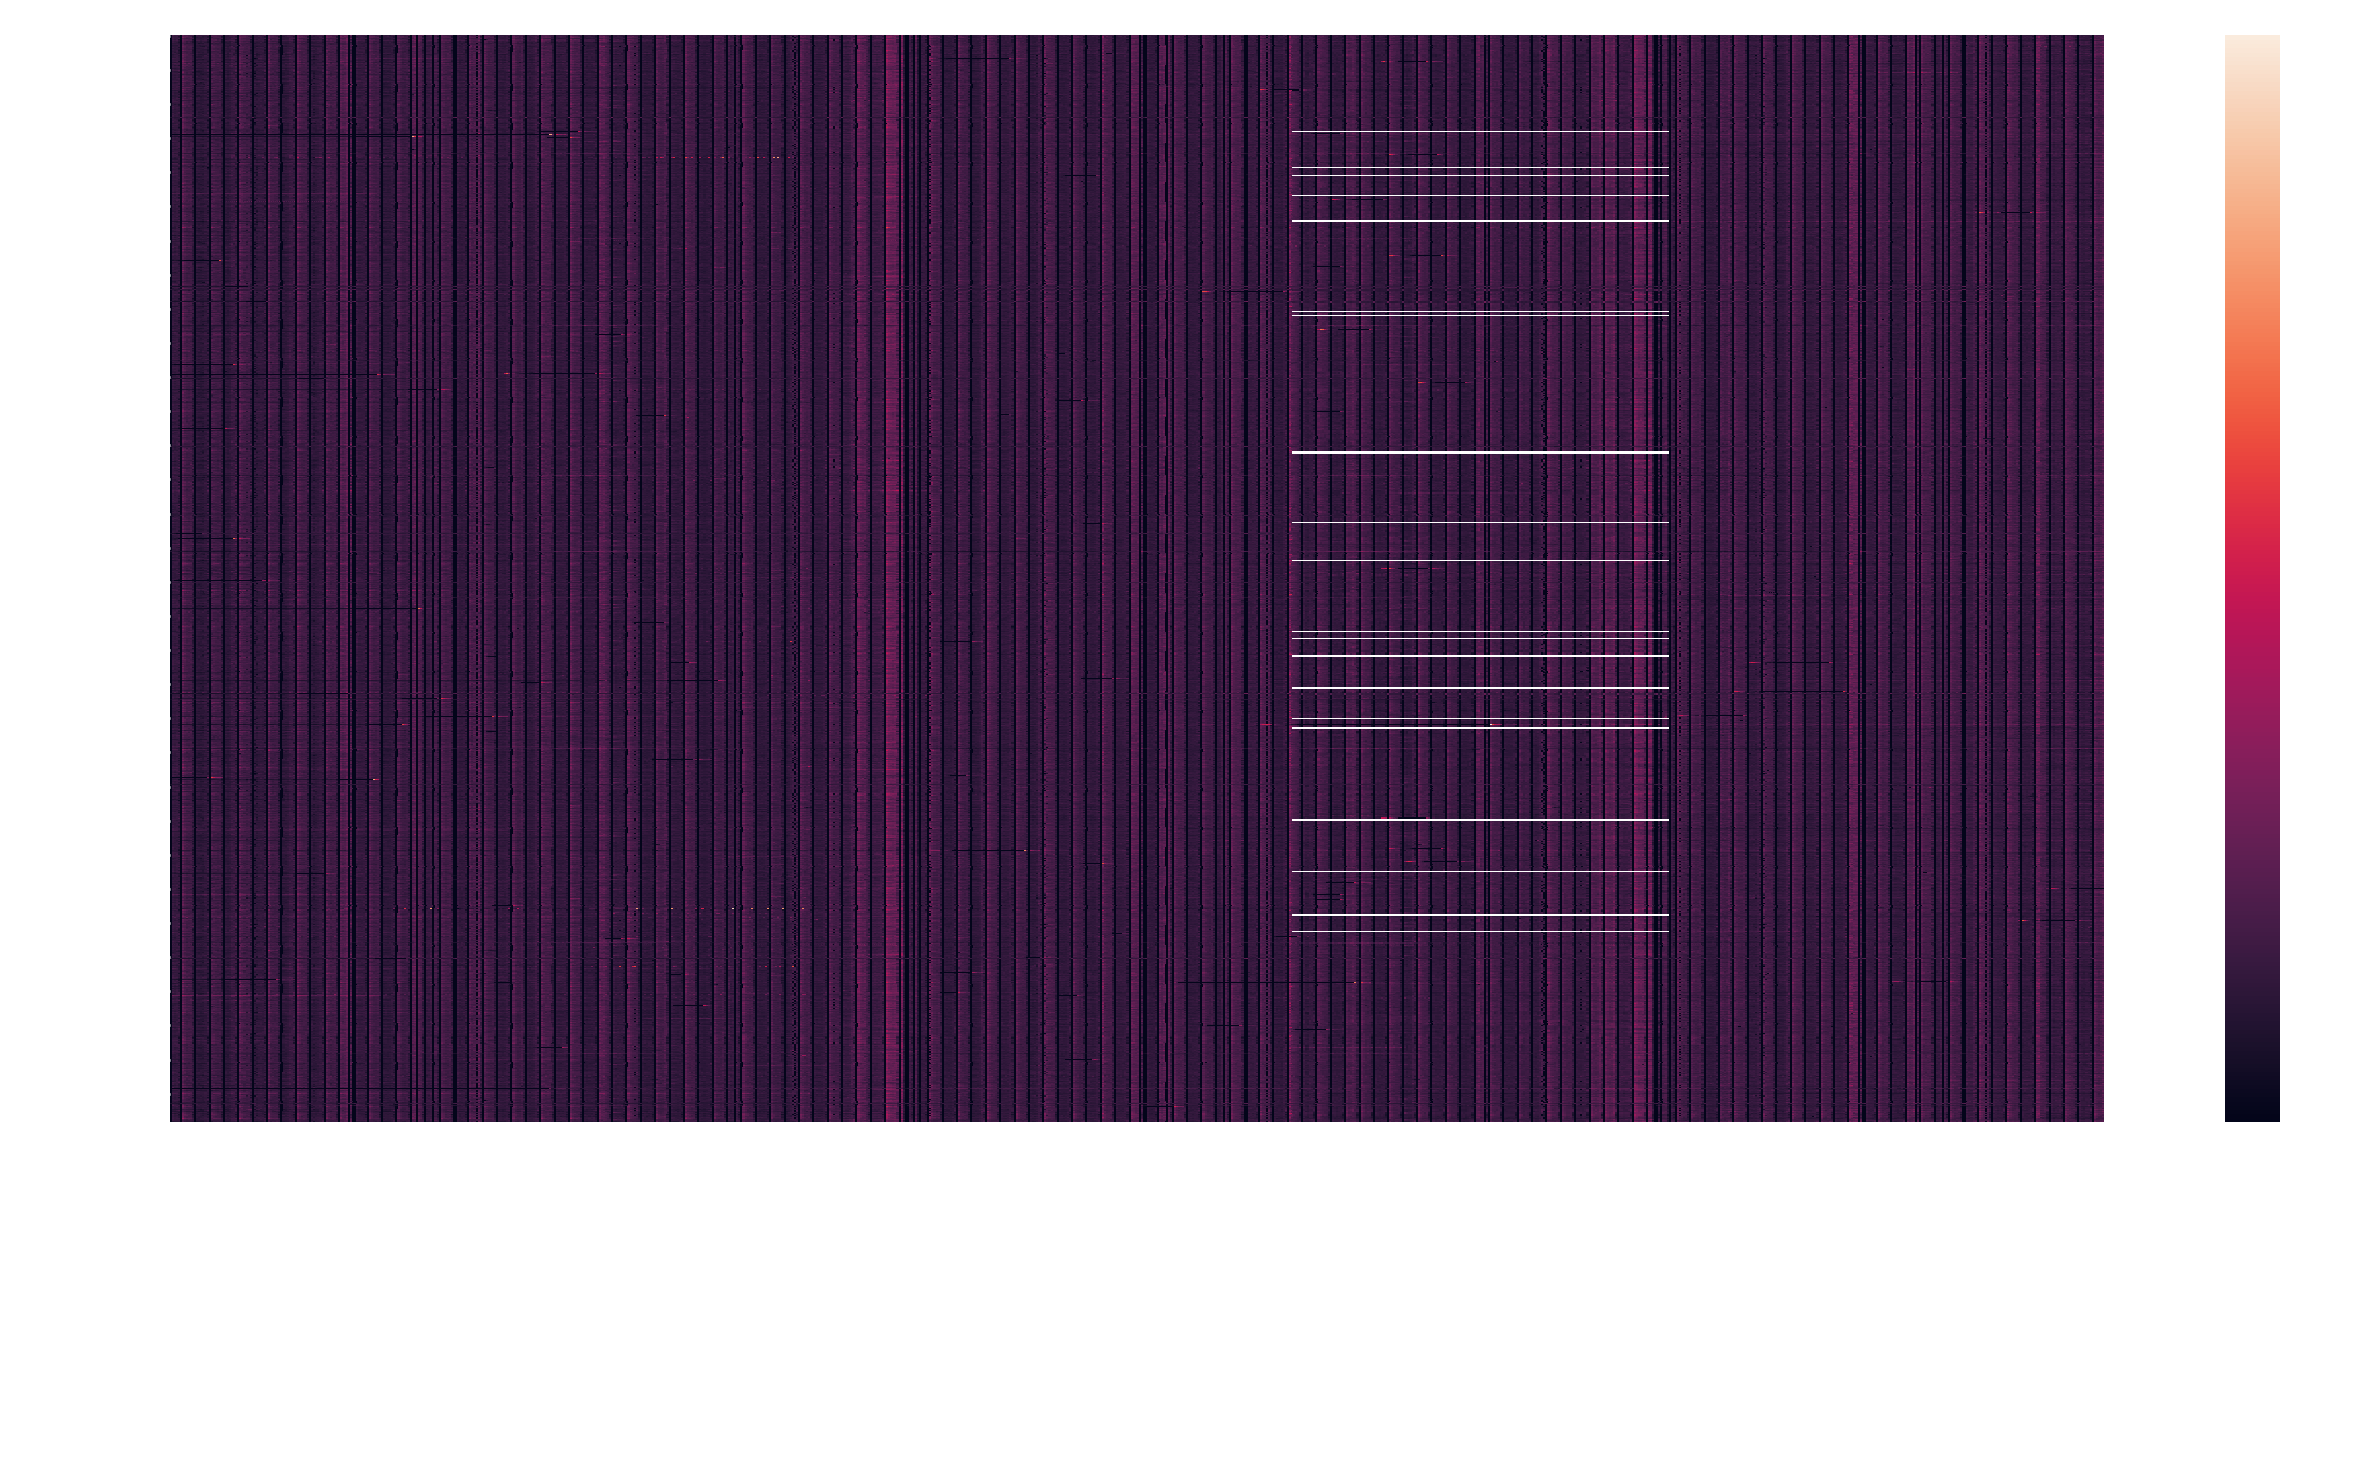

In [29]:
fig, ax = plt.subplots(figsize=(13, 6))
sb.heatmap(data=x_norm, ax=ax);

So how does this fit in with group by? Well, group by is an easy way of getting a MultiIndex and then performing a function on a row/column of the above plot.

### Recap
* stack
* unstack